For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Import linear regression implementation
from linear_regression import LinearRegression

In [25]:
# Load data
data = pd.read_csv('mission1.csv')

In [ ]:
lin_reg = LinearRegression(learning_rate=0.001, epochs=25000)

lin_reg.fit(data['Net_Activity'], data['Energy'])
predictions = lin_reg.predict(data['Net_Activity'])

<IPython.core.display.Latex object>

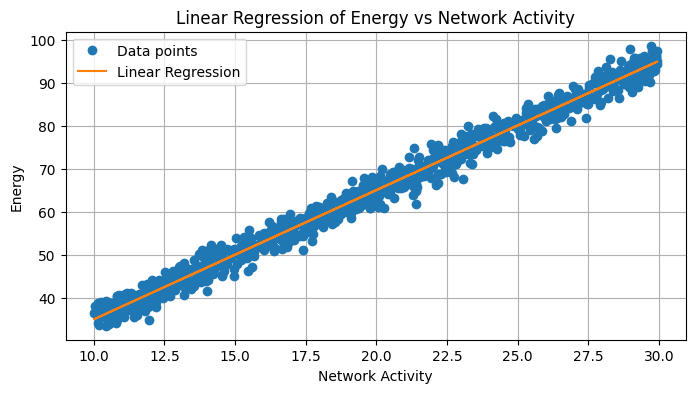

In [ ]:
from IPython.display import Latex
display(Latex(r'Energy consumption formula: $E = %.2f \cdot \mathrm{X} + %.2f$' % (lin_reg.weight.round(2), lin_reg.bias.round(2))))

# Plot linear regression results
plt.figure(figsize=(8, 4))
plt.title('Linear Regression of Energy vs Network Activity')
plt.plot(data['Net_Activity'], data['Energy'], 'o', label='Data points')
plt.plot(data['Net_Activity'], predictions, label='Linear Regression')
plt.xlabel('Network Activity')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

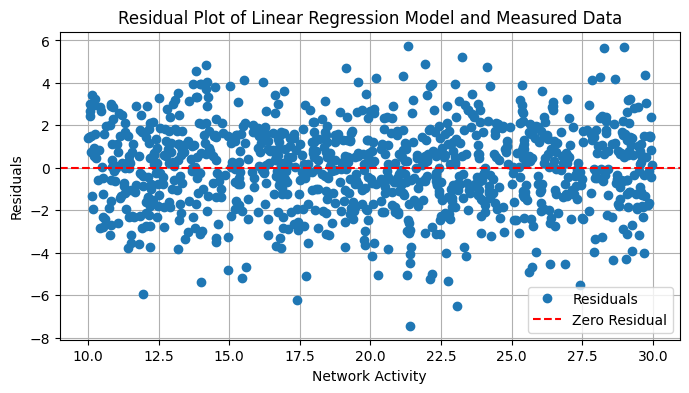

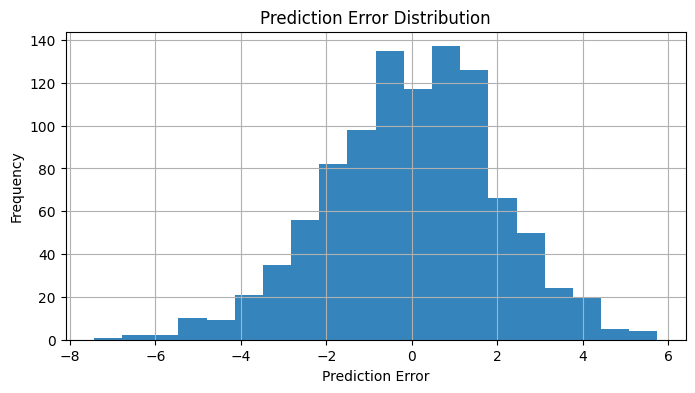

In [ ]:
# Plot residuals and prediction error distribution

residuals = data['Energy'] - predictions

plt.figure(figsize=(8, 4))
plt.title('Residual Plot of Linear Regression Model and Measured Data')
plt.plot(data['Net_Activity'], residuals, 'o', label='Residuals')
plt.axhline(0, color='r', linestyle='--', label='Zero Residual')
plt.xlabel('Network Activity')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Prediction Error Distribution')
plt.hist(residuals, bins=20, alpha=0.9)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Mission 1 - Task 2: Discussion
- **(a)** The visualization of the fitted linear curve can be seen in the first plot above, together with the derived energy consumption formula $$E = 3.06 \cdot \mathrm{X} + 3.84$$
- **(b)** Looking at the residual plot of our linear regression model (prediction error distribution), we can clearly see symmetry between the data points on both sides of the zero residual line, both in density and magnitude of the residual. There is some difference in that the negative side has two data points under 6. This symmetry is relatively constant for all values of network activity, indicating that the variance is approximately constant. These patterns are all indicators of a good curve fit. Looking at the prediction error distribution, we see that the prediction errors follow a gaussian distribution with an expected value of approximately zero. An unbiased estimator is an estimator whose expected value equals the true value of the parameter it is trying to estimate.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [ ]:
# Import logistic regression implementation
from logistic_regression import LogisticRegression

In [ ]:
data = pd.read_csv('mission2.csv')

train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_train = train[['x0', 'x1']].values
y_train = train['y'].values

X_test = test[['x0', 'x1']].values
y_test = test['y'].values

#### Analyzing the Data

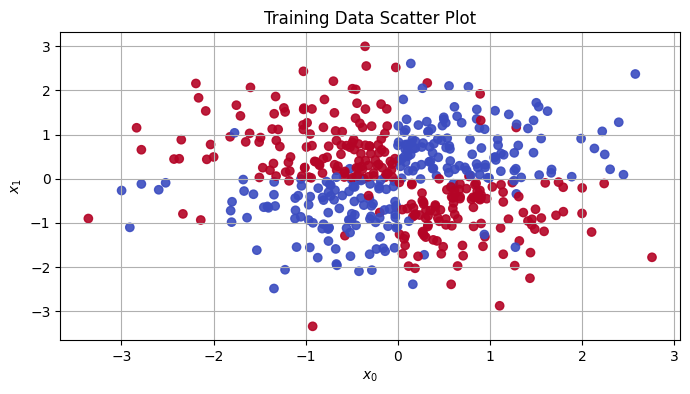

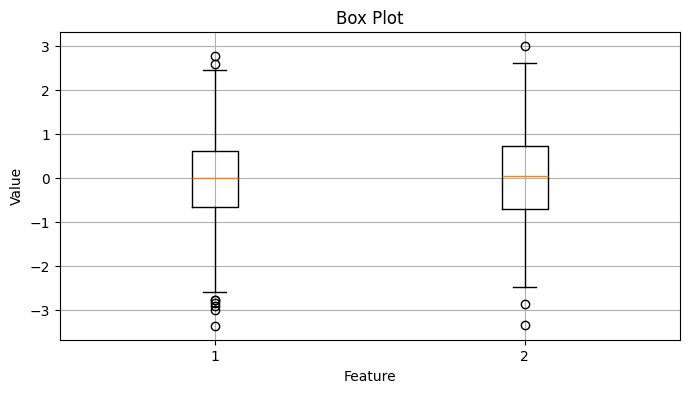

In [ ]:
# Scatter plot of training data points
plt.figure(figsize=(8, 4))
plt.title('Training Data Scatter Plot')
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap=plt.cm.coolwarm, alpha=0.9)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.grid(True)
plt.show()

# Box plot of feature values
plt.figure(figsize=(8, 4))
plt.title('Box Plot')
plt.boxplot(train.drop(columns=['y', 'split']).values)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.grid(True)
plt.show()


#### Feature Engineering

In [ ]:
train['x0_x1'] = train['x0'] * train['x1']
test['x0_x1'] = test['x0'] * test['x1']

X_train_fe = train[['x0', 'x1', 'x0_x1']].values
X_test_fe = test[['x0', 'x1', 'x0_x1']].values

In [73]:
def plot_decision_boundary(model, X, y):
    # Create a meshgrid covering the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict on the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot contour and training points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

In [ ]:
log_reg = LogisticRegression(learning_rate=0.01, epochs=5000)

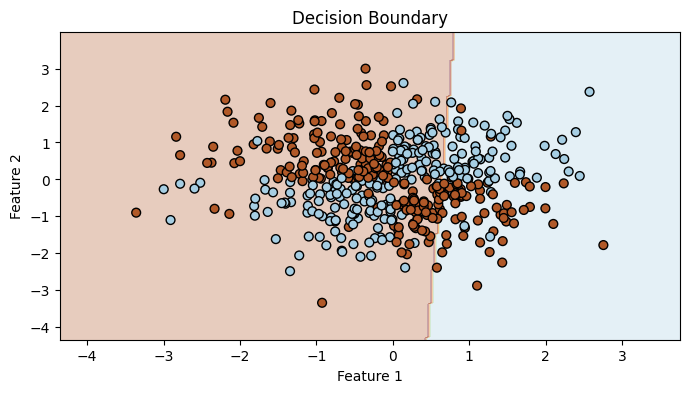

In [76]:
log_reg.fit(X_train, y_train)

plt.figure(figsize=(8, 4))
plot_decision_boundary(log_reg, X_train, y_train)

In [65]:
log_reg = LogisticRegression(learning_rate=0.01, epochs=5000)

log_reg.fit(X_train_fe, y_train)
predictions = log_reg.predict(X_test_fe)

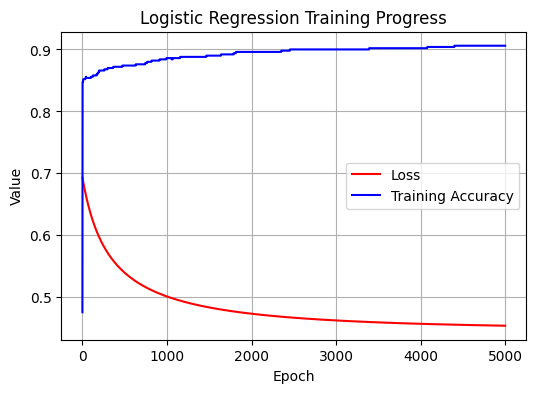

In [70]:
epoch_list = np.arange(0, log_reg.epochs, 1)
plt.figure(figsize=(6, 4))
plt.title('Logistic Regression Training Progress')
plt.plot(epoch_list, log_reg.losses, c='red', label='Loss')
plt.plot(epoch_list, log_reg.train_accuracies, c='blue', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [67]:
print(f"Test accuracy: {log_reg.accuracy(y_test, predictions)}")

Test accuracy: 0.896


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [7]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [8]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

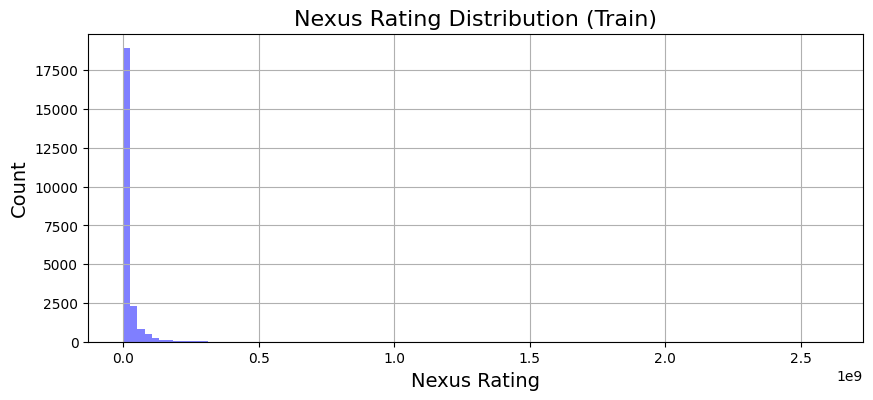

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [10]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
